In [8]:
import os.path
import numpy as np
import h5py
#import tensorboard as tensorboard
#from tensorboard.plugins import projector
import tensorflow as tf
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow.keras as tk
import tensorflow.keras.layers as tkl
from sklearn.model_selection import train_test_split

In [9]:
root =r"C:\Users\nampo\Downloads"
vicpath = "ASCAD_data/ASCAD_databases/"
in_file = h5py.File(os.path.join(vicpath,"ascad-variable.h5"), "r")
print(in_file.keys())
print(in_file['Attack_traces'].keys())

X_profiling = np.array(in_file['Profiling_traces/traces'], dtype=np.float64)
# Load profiling labels
Y_profiling = np.array(in_file['Profiling_traces/labels'], dtype = np.uint8)

# Load attacking traces
X_attack = np.array(in_file['Attack_traces/traces'], dtype=np.float64)
# Load attacking labels
Y_attack = np.array(in_file['Attack_traces/labels'], dtype = np.uint8)

<KeysViewHDF5 ['Attack_traces', 'Profiling_traces']>
<KeysViewHDF5 ['labels', 'metadata', 'traces']>


In [10]:
print(X_profiling.shape)
print(X_attack)
print(Y_profiling.shape)
print(Y_attack)
print(min(Y_profiling), max(Y_profiling))
print(np.min(X_profiling), np.max(X_profiling))

(200000, 1400)
[[-20. -22. -27. ... -86. -85. -86.]
 [-20. -24. -28. ... -85. -85. -84.]
 [-19. -25. -29. ... -85. -86. -85.]
 ...
 [-21. -23. -28. ... -85. -87. -85.]
 [-21. -24. -29. ... -86. -84. -85.]
 [-21. -21. -26. ... -85. -85. -85.]]
(200000,)
[145 220   4 ...  49 208 251]
0 255
-116.0 100.0


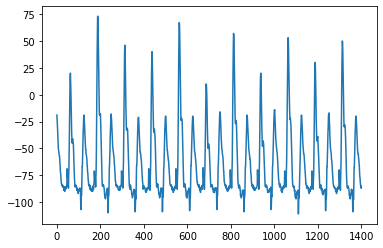

In [11]:
plt.plot(X_profiling[0,:])

In [12]:
feature_profiling = pd.DataFrame(X_profiling)
label_profiling = pd.DataFrame(Y_profiling)

dataset_profiling = pd.concat([feature_profiling, label_profiling], axis = 1, ignore_index=True)
dataset_profiling.head()

,0,1,2,3,4,5,6,7,8,9,...,1391,1392,1393,1394,1395,1396,1397,1398,1399,1400
0,-19.0,-23.0,-27.0,-32.0,-38.0,-41.0,-47.0,-51.0,-52.0,-54.0,...,-72.0,-76.0,-77.0,-81.0,-83.0,-85.0,-86.0,-85.0,-87.0,125
1,-19.0,-25.0,-30.0,-35.0,-41.0,-45.0,-48.0,-50.0,-53.0,-53.0,...,-74.0,-77.0,-80.0,-84.0,-84.0,-85.0,-85.0,-85.0,-86.0,74
2,-20.0,-26.0,-28.0,-32.0,-40.0,-43.0,-48.0,-51.0,-53.0,-56.0,...,-72.0,-75.0,-78.0,-82.0,-83.0,-84.0,-85.0,-86.0,-86.0,99
3,-20.0,-25.0,-27.0,-34.0,-40.0,-44.0,-47.0,-50.0,-52.0,-54.0,...,-73.0,-76.0,-80.0,-83.0,-84.0,-85.0,-84.0,-84.0,-84.0,114
4,-22.0,-25.0,-27.0,-33.0,-39.0,-44.0,-48.0,-51.0,-52.0,-54.0,...,-72.0,-75.0,-78.0,-82.0,-84.0,-84.0,-85.0,-84.0,-84.0,39


In [13]:
#X_train, X_test, y_train, y_test = train_test_split(X_profiling, Y_profiling, test_size=0.33,shuffle=True, random_state=42)

In [14]:
#X_train = X_train[:50000,:]
#y_train = y_train[:50000]

#X_test = X_test[:10000,:]
#y_test = y_test[:10000]

#nb_classes = 256
#initializer = tk.initializers.GlorotUniform()
#y_train = tf.one_hot(y_train,depth = 256)
#X_train = X_train[:,:,np.newaxis]
#X_test = X_test[:,:,np.newaxis]
#print(X_train.shape)
#y_test = tf.one_hot(y_test,depth = 256)

In [15]:
#print(X_train.shape)
#input_shape = (None,1400,1)
#model = tk.models.Sequential()
#model.add(tkl.LSTM(1024,kernel_initializer=initializer))
#model.add(tkl.Dense(512, activation=tk.layers.LeakyReLU(alpha=0.3),kernel_initializer=initializer))
#model.add(tkl.Dense(nb_classes, activation='softmax',kernel_initializer=initializer))

#model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#model.build(input_shape)
#print(model.summary())
#history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=400, batch_size=1024)

In [16]:
#summarize history for accuracy
#plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
#plt.title('model accuracy')
#plt.ylabel('accuracy')
#plt.xlabel('epoch')
#plt.legend(['train', 'test'], loc='upper left')
#plt.show()
#summarize history for loss
#plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
#plt.title('model loss')
#plt.ylabel('loss')
#plt.xlabel('epoch')
#plt.legend(['train', 'test'], loc='upper left')
#plt.show()

In [17]:
def generate_triplet(list_X, list_y,X,y):
    triplets = np.empty((1,4200))
    labels = []
    for i in range(X.shape[0]):
        index_pos = np.random.choice(np.where(list_y == y[i])[0])
        index_neg = np.random.choice(np.where(list_y != y[i])[0])
        result = np.concatenate((X[i,:],list_X[index_pos,:]), axis = -1)
        result = np.concatenate((result, list_X[index_neg,:]), axis = -1)
        triplets = np.concatenate((triplets, result[np.newaxis,:]), axis = 0)
        assert y[i] == list_y[index_pos] and y[i] != list_y[index_neg]
        labels.append(np.array([y[i], list_y[index_pos], list_y[index_neg]]))
    return triplets, labels

In [18]:
#triplets, labels = generate_triplet(X_profiling, Y_profiling)

In [19]:
def normalize(X_train, mean = None, std = None):
    if mean is None or std is None:
        mean = np.mean(X_train)
        std = np.std(X_train)
    X_train =(X_train - mean)/std
    return X_train, mean, std

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_profiling, Y_profiling, test_size=0.3, random_state=42, shuffle=True)
print(len(X_train))
print(len(y_train))

X_train, mean, std = normalize(X_train)
X_val, mean, std = normalize(X_val, mean, std)

batch_size = 128

# Prepare the training dataset.
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(batch_size)

# Prepare the validation dataset.
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val))
val_dataset = val_dataset.batch(batch_size)

140000
140000


2023-03-08 16:55:14.647828: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-08 16:55:29.089094: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 10000 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1080, pci bus id: 0000:03:00.0, compute capability: 6.1
2023-03-08 16:55:29.105741: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 1568000000 exceeds 10% of free system memory.
2023-03-08 16:55:29.932614: I tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:735] failed to allocate 9.77G (10485760000 bytes) from device: CUDA_ERROR_OUT_OF_MEMORY: out of memory
2023-03-08 16:55:29.933523: I tensorflow/compiler/xla/stream_

In [21]:
print(len(X_train[0]))

1400


In [22]:
def Triplet(input_shape, embedding_size):
    initializer = tk.initializers.GlorotUniform()
    model = tk.Sequential()
    model.add(tkl.Conv1D(input_shape=input_shape,filters=64,kernel_size=15,padding="same",kernel_initializer=initializer))
    model.add(tkl. BatchNormalization())
    model.add(tkl.AveragePooling1D(pool_size=15,strides=15))
    model.add(tkl.Conv1D(filters=128, kernel_size=3, padding="same",kernel_initializer=initializer))
    model.add(tkl. BatchNormalization())
    model.add(tkl.AveragePooling1D(pool_size=2,strides=2))
    model.add(tkl.Flatten(name='Flatten'))
    model.add(tkl.Dense(embedding_size,kernel_initializer=initializer))
    return model

model = Triplet(input_shape = (1400,1), embedding_size = 32)
optimizer = tk.optimizers.Adam(learning_rate = 0.0001, weight_decay = 0.0001)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 1400, 64)          1024      
                                                                 
 average_pooling1d (AverageP  (None, 93, 64)           0         
 ooling1D)                                                       
                                                                 
 conv1d_1 (Conv1D)           (None, 93, 128)           24704     
                                                                 
 average_pooling1d_1 (Averag  (None, 46, 128)          0         
 ePooling1D)                                                     
                                                                 
 Flatten (Flatten)           (None, 5888)              0         
                                                                 
 dense (Dense)               (None, 512)               3

In [23]:
def loss(feature, labels, num_classes, alpha_value):
    feature = tf.squeeze(feature)
    labels = tf.cast(tf.squeeze(labels), dtype = tf.float64)
    feature_distance = (tf.math.add(
            tf.math.reduce_sum(tf.math.square(feature), axis=[1], keepdims=True),
            tf.math.reduce_sum(tf.math.square(tf.transpose(feature)), axis=[0], keepdims=True),
        )
        - 2.0 * tf.matmul(feature, tf.transpose(feature))
    )
    label_distance = (
        tf.math.add(
            tf.math.reduce_sum(tf.math.square(labels), axis=[1], keepdims=True),
            tf.math.reduce_sum(tf.math.square(tf.transpose(labels)), axis=[0], keepdims=True),
        )
        - 2.0 * tf.matmul(labels, tf.transpose(labels)))

    result = feature_distance / tf.pow(alpha_value, tf.math.sqrt(label_distance)/num_classes)
    result = tf.math.maximum(result, 0.0)    
    return result

In [24]:
def train(model,X_profiling, Y_profiling, train_dataset, val_dataset, optimizer, epochs = 5):
    list_train_loss = []
    list_val_loss = []
    num_classes = 256
    alpha_value = 0.2
    for epoch in range(epochs):
        print("\nStart of epoch %d" % (epoch,))

        # Iterate over the batches of the dataset.
        for step,(x_batch,labels) in enumerate(train_dataset):
            triplets, triple_labels = generate_triplet(X_profiling, Y_profiling, x_batch,labels)
            triplets = triplets[:,:,np.newaxis]
            with tf.GradientTape() as tape:
                anchor = model(triplets[:,:1400,:], training=True)
                pos = model(triplets[:,1400:2800,:], training=True)
                neg = model(triplets[:,2800:,:], training=True)
                print(neg)
                triplet_loss = loss(triplets[:,:1400,:] - triplets[:,1400:2800,:],anchor - pos, num_classes, alpha_value) 
                - loss(triplets[:,:1400,:] - triplets[:,2800:,:],anchor - neg, num_classes, alpha_value)
            
            print("loss",loss_value)
            list_train_loss.append(loss_value)
            grads = tape.gradient(loss_value, model.trainable_weights)

            optimizer.apply_gradients(zip(grads, model.trainable_weights))


        # Run a validation loop at the end of each epoch.
        #for x_batch_val, y_batch_val in val_dataset:
            #a = 0
    return list_train_loss, list_val_loss

GPU matters

In [26]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [30]:
# Create virtual devices with a memory limit of 1GB
tf.config.experimental.set_virtual_device_configuration(
    physical_devices[0],
    [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=1024)])

# Enable memory growth for the first virtual device
tf.config.experimental.set_memory_growth(
    tf.config.list_logical_devices('GPU')[0], True)

RuntimeError: Virtual devices cannot be modified after being initialized

In [28]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [29]:
gpu = tf.config.experimental.list_physical_devices('GPU')[0]
tf.config.experimental.set_memory_growth(gpu, True)

ValueError: Cannot set memory growth on device when virtual devices configured

In [7]:
gpu = tf.config.experimental.list_physical_devices('GPU')[0]
tf.config.experimental.set_virtual_device_configuration(
    gpu,
    [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=10000)])


In [42]:
list_train_loss, list_val_loss = train(model,X_profiling, Y_profiling, train_dataset, val_dataset, optimizer, epochs = 5)


Start of epoch 0


2023-03-08 16:47:41.771724: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 1568000000 exceeds 10% of free system memory.


tf.Tensor(
[[       nan        nan        nan ...        nan        nan        nan]
 [10.570779   9.860428   8.360759  ... 30.477018   2.1819353  3.6045296]
 [10.621787   9.841146   8.34987   ... 30.478392   2.2107964  3.7526755]
 ...
 [10.7351055  9.445516   7.924556  ... 30.121624   1.805315   3.2220488]
 [10.538928   9.637163   8.361313  ... 30.002348   1.9840698  3.6449728]
 [10.4002495  9.771699   8.024291  ... 29.767025   2.0494995  3.552575 ]], shape=(1025, 32), dtype=float32)


2023-03-08 16:48:06.189881: W tensorflow/tsl/framework/bfc_allocator.cc:479] Allocator (GPU_0_bfc) ran out of memory trying to allocate 10.96GiB (rounded to 11767000064)requested by op AddV2
If the cause is memory fragmentation maybe the environment variable 'TF_GPU_ALLOCATOR=cuda_malloc_async' will improve the situation. 
Current allocation summary follows.
Current allocation summary follows.
2023-03-08 16:48:06.189947: I tensorflow/tsl/framework/bfc_allocator.cc:1034] BFCAllocator dump for GPU_0_bfc
2023-03-08 16:48:06.189972: I tensorflow/tsl/framework/bfc_allocator.cc:1041] Bin (256): 	Total Chunks: 21, Chunks in use: 21. 5.2KiB allocated for chunks. 5.2KiB in use in bin. 1.2KiB client-requested in use in bin.
2023-03-08 16:48:06.189990: I tensorflow/tsl/framework/bfc_allocator.cc:1041] Bin (512): 	Total Chunks: 3, Chunks in use: 3. 1.5KiB allocated for chunks. 1.5KiB in use in bin. 1.5KiB client-requested in use in bin.
2023-03-08 16:48:06.190005: I tensorflow/tsl/framework/bfc_al

ResourceExhaustedError: {{function_node __wrapped__AddV2_device_/job:localhost/replica:0/task:0/device:GPU:0}} failed to allocate memory [Op:AddV2]